Topic:        Challenge Set 5

Subject:      Linear Splitting

Date:         1/29/2018

Name:         Browning Gentry

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import patsy
pd.set_option('display.max_columns', 500)

%matplotlib inline

/Users/bgentry/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/bgentry/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
return false; 
}

<IPython.core.display.Javascript object>

In [4]:
with open("cfb_grad_stats_2yr.pkl", 'rb') as picklefile: 
    df_cfb = pickle.load(picklefile)
with open("player_bio.pkl", 'rb') as picklefile: 
    df_bio = pickle.load(picklefile)
with open("nfl_games.pkl", 'rb') as picklefile: 
    df_nfl = pickle.load(picklefile)

In [5]:
del df_nfl['year']
# merge the data
df = df_cfb.merge(df_bio, left_on='player', right_on='name')
df = df.merge(df_nfl, on = 'player')

del df['name']
del df['year_id']
players_to_drop = ['Mark Miller', 'Steve Matthews', 'Ken Karcher', 'Kevin Thompson', 'Joe Reed', 'Alex Espinoza']
df = df[~df.player.isin(players_to_drop)]
del df['player']
df['weight'] = df.apply(lambda x: int(x['weight']), axis=1)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

# Challenge 1

In [6]:
df['const'] = df.apply(lambda x: 1, axis=1)
y, X = patsy.dmatrices('games ~ const - 1', data=df, return_type='dataframe')
model = sm.OLS(y,X, hasconst=False)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  games   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     188.6
Date:                Mon, 22 Jan 2018   Prob (F-statistic):           5.26e-36
Time:                        14:57:51   Log-Likelihood:                -2346.1
No. Observations:                 444   AIC:                             4694.
Df Residuals:                     443   BIC:                             4698.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.1239      2.266     13.733      0.000      26.670      35.578
==============================================================================
Omnibus:                      200.410   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.706
Skew:                           2.133   Prob(JB):                    7.75e-155
Kurtosis:                       7.490   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

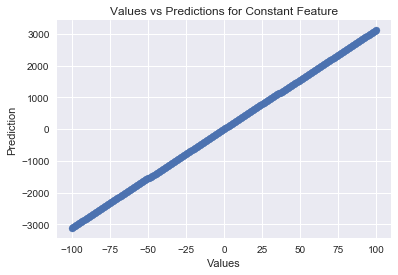

In [7]:
vals = [i for i in range(-100,101)]
preds = fit.predict(vals)

plt.scatter(vals, preds)
plt.xlabel('Values')
plt.ylabel('Prediction')
plt.title('Values vs Predictions for Constant Feature');

In [8]:
df.games.mean()

31.123873873873872

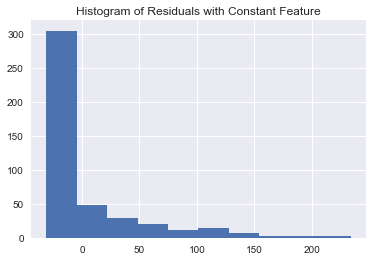

In [9]:
resid = fit.resid.tolist()
plt.hist(resid)
plt.title('Histogram of Residuals with Constant Feature');

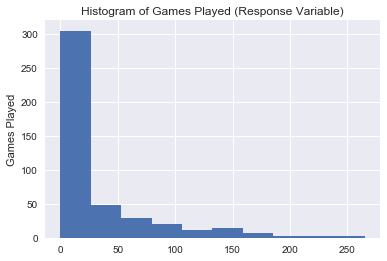

In [10]:
plt.hist(df.games)
plt.title('Histogram of Games Played (Response Variable)')
plt.ylabel('Games Played');

### Question Response
The model simply calculates the mean of the response variable as the coeffeicient of the constant term and predicts values based on that. In this case, the mean = 31.1, feature value = 2, then the prediction = mean * value = 62.2. The residuals in this model are not normally distributed -  they seem to follow the same distribution as the response variable.

# Challenge 2

In [11]:
y2, X2 = patsy.dmatrices('games ~ pass_yds', data=df, return_type='dataframe')
model = sm.OLS(y2,X2)
fit2 = model.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  games   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.309
Date:                Mon, 22 Jan 2018   Prob (F-statistic):              0.129
Time:                        14:57:52   Log-Likelihood:                -2344.9
No. Observations:                 444   AIC:                             4694.
Df Residuals:                     442   BIC:                             4702.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.1657      5.108      4.731      0.000      14.127      34.204
pass_yds       0.0033      0.002      1.520      0.129      -0.001       0.008
==============================================================================
Omnibus:                      199.073   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.193
Skew:                           2.124   Prob(JB):                    6.66e-152
Kurtosis:                       7.427   Cond. No.                     5.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

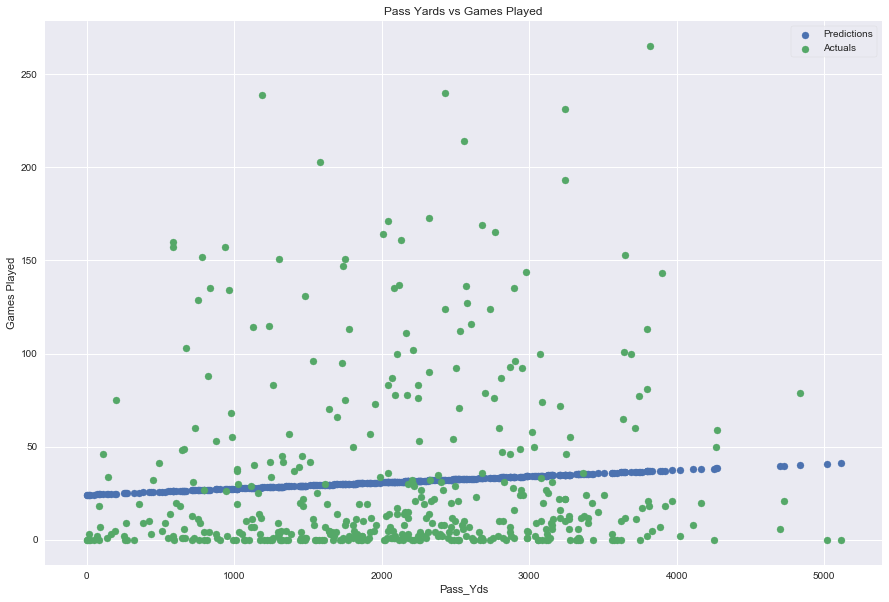

In [12]:
preds2 = fit2.predict(X2)
resid2 = fit2.resid.tolist()

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.scatter(df.pass_yds, preds2, label='Predictions')
ax1.scatter(df.pass_yds, df.games, label='Actuals')
plt.title('Pass Yards vs Games Played')
plt.ylabel('Games Played')
plt.xlabel('Pass_Yds')
plt.legend(frameon = 'True');

/Users/bgentry/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


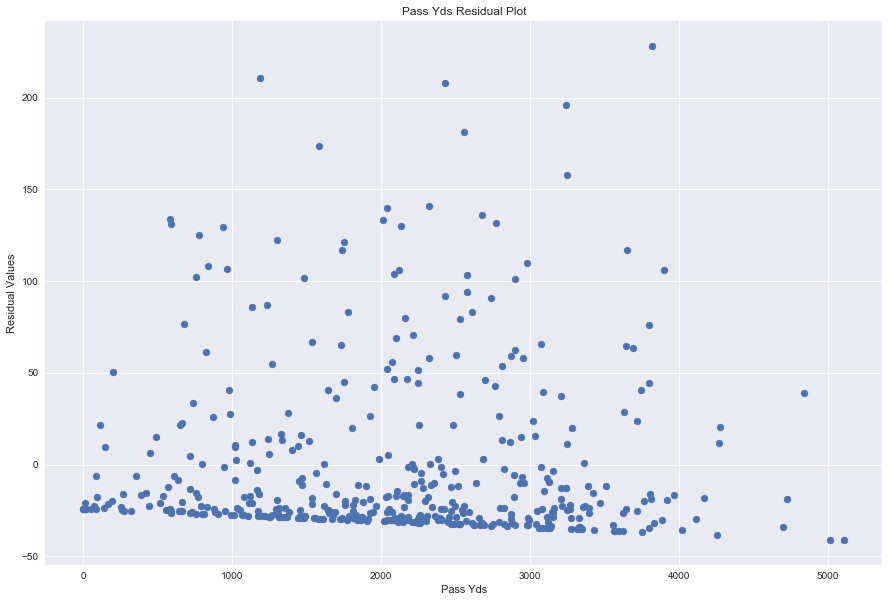

In [13]:
fig = plt.figure(figsize=(15,10))
plt.scatter(df.pass_yds, resid2)
plt.xlabel('Pass Yds')
plt.ylabel('Residual Values')
plt.title('Pass Yds Residual Plot')
plt.legend();

### Question Response
The model is now using the feature to help better predict the response variable. There is definitely a lot of noise in the feature, which is causing the model to be relatively poor. The R^2 value is only .005, which indicates that the current model explains very little of the variability in the response.

The residual plot is showing that the residuals are not randomly distributed around zero, which could indicate that there is something else going on in the model causing issues.

# Challenge 3

In [14]:
df2 = df.copy()
df2 = pd.get_dummies(df2, columns = ['school_name'], drop_first=True)
df2.columns = df2.columns.str.replace('\s+', '_')
df2.columns = df2.columns.str.replace('-', '_')
df2.columns = df2.columns.str.replace(')', '')
df2.columns = df2.columns.str.replace('(', '')
df2.columns = df2.columns.str.replace('&', 'and')
school_col = [col for col in df2 if col.startswith('school_name_')]

In [15]:
school_str = ''
for col in school_col:
    school_str += col + " + "
school_str = school_str[0:len(school_str)-3]

In [16]:
lm = smf.ols('games ~ ' + school_str, data=df2)
fit3 = lm.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  games   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                 -0.074
Method:                 Least Squares   F-statistic:                    0.7251
Date:                Mon, 22 Jan 2018   Prob (F-statistic):              0.977
Time:                        14:57:54   Log-Likelihood:                -2297.9
No. Observations:                 444   AIC:                             4820.
Df Residuals:                     332   BIC:                             5278.
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           50.0000     18.706      2.673      0.008      13.203      86.797
school_name_Arizona                -48.5000     39.681     -1.222      0.222    -126.558      29.558
school_name_Arizona_State          -23.3750     25.614     -0.913      0.362     -73.761      27.011
school_name_Arkansas               -38.0000     34.152     -1.113      0.267    -105.181      29.181
school_name_Arkansas_State         -42.0000     52.908     -0.794      0.428    -146.077      62.077
school_name_Auburn                 -22.3333     34.152     -0.654      0.514     -89.515      44.848
school_name_Baylor                 -41.8000     28.979     -1.442      0.150     -98.805      15.205
school_name_Boise_State            -48.0000     52.908     -0.907      0.365    -152.077      56.077
school_name_Boston_College         -32.3750     25.614     -1.264      0.207     -82.761      18.011
school_name_Bowling_Green_State    -49.0000     52.908     -0.926      0.355    -153.077      55.077
school_name_Brigham_Young           -7.1667     27.534     -0.260      0.795     -61.330      46.997
school_name_Buffalo                -41.0000     52.908     -0.775      0.439    -145.077      63.077
school_name_Cal_State_Fullerton    -41.0000     52.908     -0.775      0.439    -145.077      63.077
school_name_California              -9.6667     24.941     -0.388      0.699     -58.729      39.396
school_name_Central_Michigan       -13.0000     52.908     -0.246      0.806    -117.077      91.077
school_name_Cincinnati             -44.5000     39.681     -1.121      0.263    -122.558      33.558
school_name_Clemson                 -8.0000     52.908     -0.151      0.880    -112.077      96.077
school_name_Colorado                -2.5000     39.681     -0.063      0.950     -80.558      75.558
school_name_Colorado_State         -47.6667     34.152     -1.396      0.164    -114.848      19.515
school_name_Columbia               -34.0000     39.681     -0.857      0.392    -112.058      44.058
school_name_Connecticut            -38.0000     52.908     -0.718      0.473    -142.077      66.077
school_name_Dartmouth              -28.0000     52.908     -0.529      0.597    -132.077      76.077
school_name_Duke                   -37.5714     26.454     -1.420      0.156     -89.610      14.467
school_name_East_Carolina            8.6667     34.152      0.254      0.800     -58.515      75.848
school_name_Eastern_Michigan         5.0000     52.908      0.095      0.925     -99.077     109.077
school_name_Florida                -40.2857     26.454     -1.523      0.129     -92.324      11.753
school_name_Florida_Atlantic       -49.0000     52.908     -0.926      0.355    -153.077      55.077
school_name_Florida_State          -32.3333     24.94

In [17]:
school_dict = {}
i=1
for row in df.sort_values('school_name').school_name:
    if row not in school_dict:
        school_dict[row] = i
        i += 1 

In [18]:
df['school_index'] = df.school_name.map(school_dict)

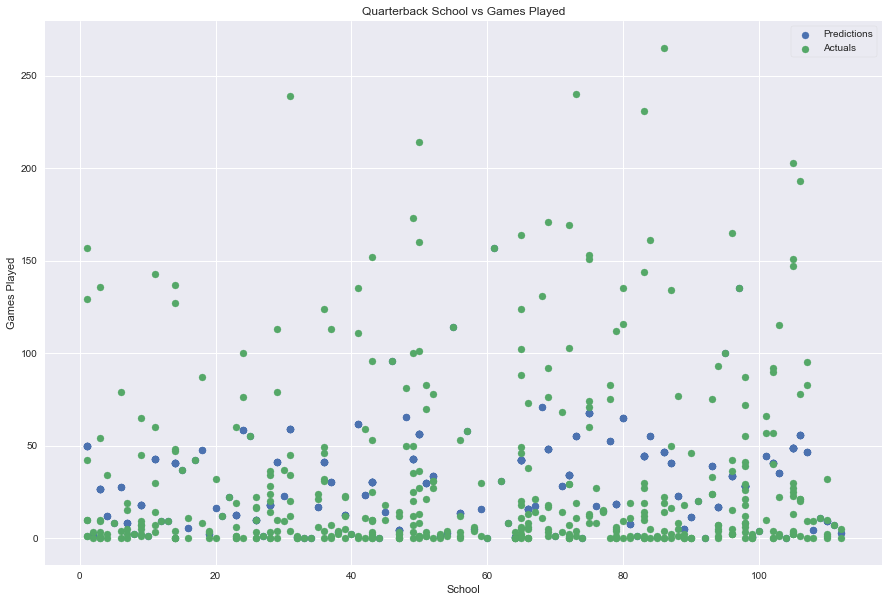

In [19]:
preds3 = fit3.predict(df2[school_col])
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.scatter(df.school_index, preds3, label='Predictions')
ax1.scatter(df.school_index, df.games, label='Actuals')
plt.title('Quarterback School vs Games Played')
plt.ylabel('Games Played')
plt.xlabel('School')
plt.legend(frameon = 'True');

/Users/bgentry/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


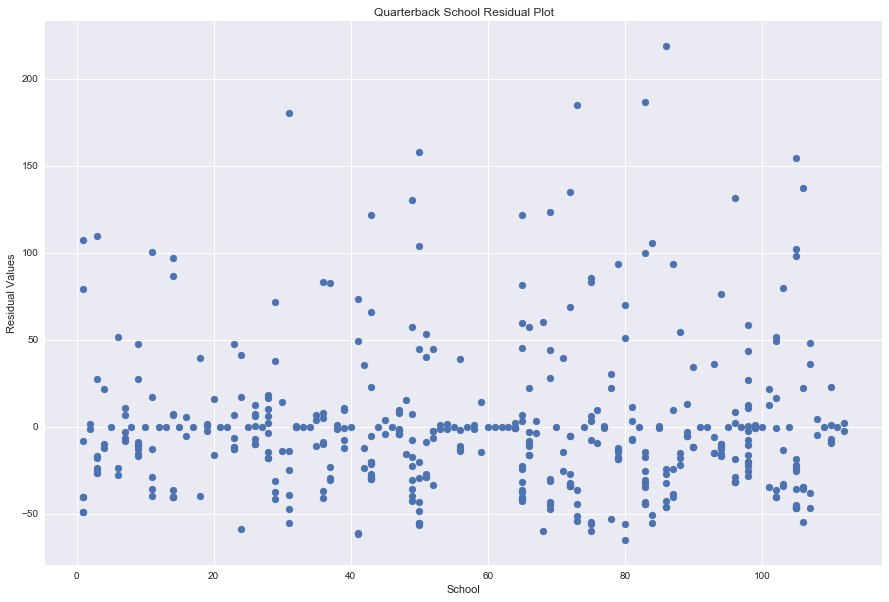

In [20]:
resid3 = fit3.resid
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.scatter(df.school_index, resid3)
plt.title('Quarterback School Residual Plot')
plt.xlabel('School')
plt.ylabel('Residual Values')
plt.legend(frameon = 'True');

### Question Response
The model is now using the categorical feature to help better predict the response variable. This feature also introduces a lot of noise into the model, and though the R^2 value is somewhat better, the adjusted R^2 is very low, indicating that the R^2 value may be driven simply by the large number of features. Plotted, there seems to be no real relationship between the actual and the predicted values and they seem generally far apart.

The residual plot is showing that the residuals are not randomly distributed around zero, which could indicate that there is something else going on in the model that is causing issues. There are many residuals high above zero, which could indicate that the model is baised towards reporting overly large values for the response variable.

# Challenge 4

In [21]:
df['log_games'] = df.apply(lambda x: x['games'] + 1, axis=1)
df['log_games'] = np.log(df.log_games)

### Log Transformation
I decided to perform a log transformation on my response variable because it was clearly not normal. Unfortunately, I have a number of zero values for games played, so I needed to add one to every observation in order to do the log transformation. After, the distribution looks more normal (though still not perfect!).

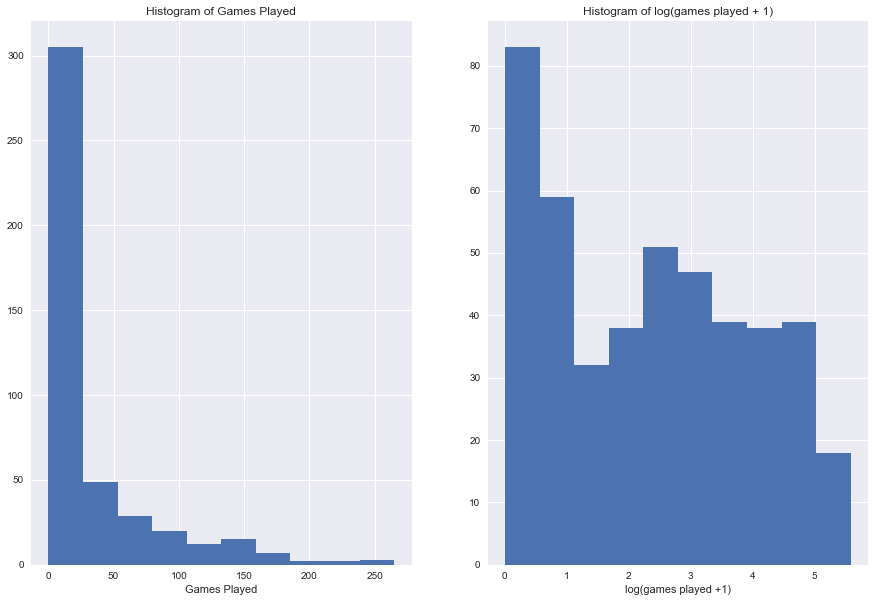

In [22]:
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
plt.hist(df.games)
plt.title('Histogram of Games Played')
plt.xlabel('Games Played');

plt.subplot(1,2,2)
plt.hist(df.log_games)
plt.title('Histogram of log(games played + 1)')
plt.xlabel('log(games played +1)');



In [23]:
lm = smf.ols('log_games ~ pass_yds + pass_td + pass_att + pass_int', data=df)
fit4 = lm.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_games   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.046
Date:                Mon, 22 Jan 2018   Prob (F-statistic):             0.0170
Time:                        14:57:57   Log-Likelihood:                -847.82
No. Observations:                 444   AIC:                             1706.
Df Residuals:                     439   BIC:                             1726.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8601      0.205      9.063      0.000       1.457       2.263
pass_yds   -4.254e-06      0.000     -0.012      0.991      -0.001       0.001
pass_td        0.0380      0.019      1.978      0.049       0.000       0.076
pass_att      -0.0017      0.003     -0.671      0.503      -0.007       0.003
pass_int       0.0367      0.020      1.796      0.073      -0.003       0.077
==============================================================================
Omnibus:                      169.301   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.320
Skew:                           0.114   Prob(JB):                     5.24e-06
Kurtosis:                       1.876   Cond. No.                     6.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
x_cols = ['pass_yds', 'pass_td', 'pass_att', 'pass_int']
preds4 = fit4.predict(df[x_cols])
index = [i for i in range(len(preds4))]

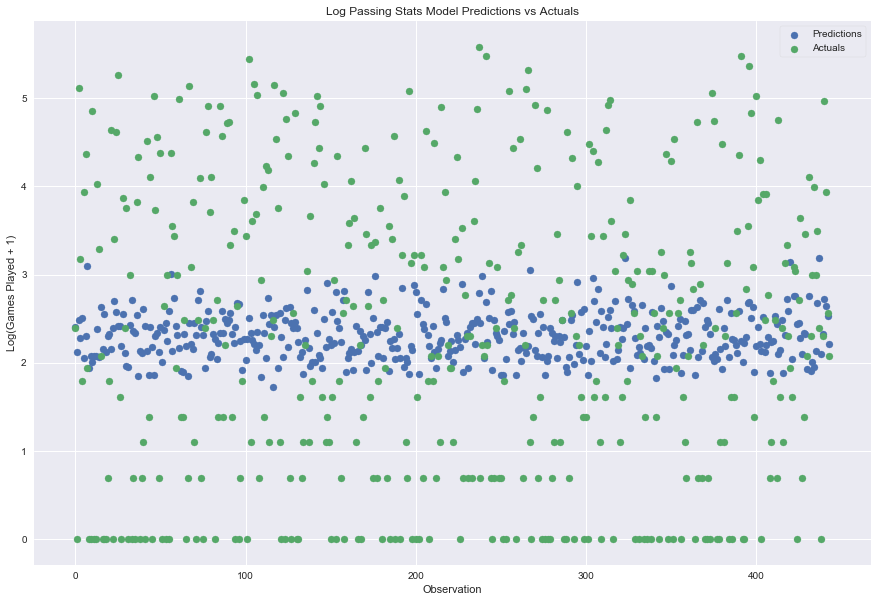

In [25]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.scatter(index, preds4, label='Predictions')
ax1.scatter(index, df.log_games, label='Actuals')
plt.title('Log Passing Stats Model Predictions vs Actuals')
plt.ylabel('Log(Games Played + 1)')
plt.xlabel('Observation')
plt.legend(frameon = 'True');

/Users/bgentry/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


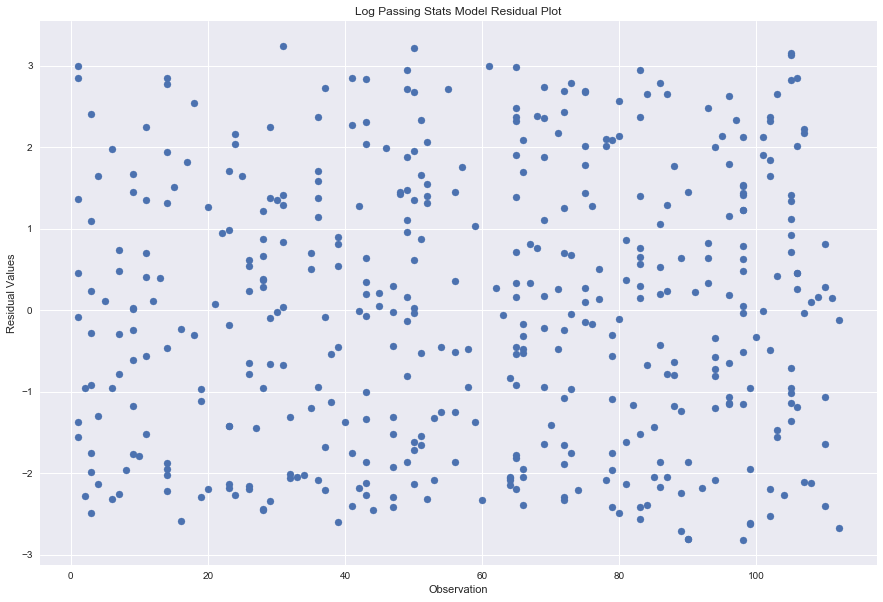

In [26]:
resid4 = fit4.resid
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.scatter(df.school_index, resid4)
plt.title('Log Passing Stats Model Residual Plot')
plt.xlabel('Observation')
plt.ylabel('Residual Values')
plt.legend(frameon = 'True');

### Question Response
This model still has a very low R^2 and adjusted R^2, but it does seem to do better than the model with only one continous variable. One of the biggest problems with this model is it's lack of ability to handle the amount of noise in the data - any of the outlying data points are poorly captured. As features are added, hopefully the model will account for more and more variability.

The residual plot is showing that the residuals are now very well randomly distributed around zero - this is most likely due to the log transformation of the response variable.

# Challenge 5

In [27]:
X5 = df[x_cols]
y = df.log_games
lr = LinearRegression()
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, test_size=0.25)
lr.fit(X5_train, y_train)
lr.score(X5_test, y_test)

-0.065606034762183851

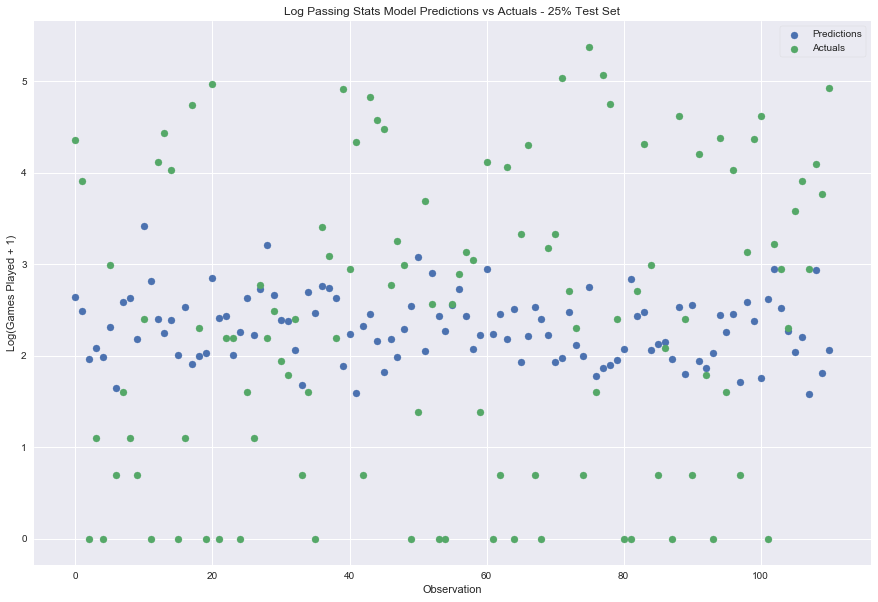

In [28]:
preds5 = lr.predict(X5_test)
index5 = [i for i in range(len(X5_test))]
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.scatter(index5, preds5, label='Predictions')
ax1.scatter(index5, y_test, label='Actuals')
plt.title('Log Passing Stats Model Predictions vs Actuals - 25% Test Set')
plt.ylabel('Log(Games Played + 1)')
plt.xlabel('Observation')
plt.legend(frameon = 'True');

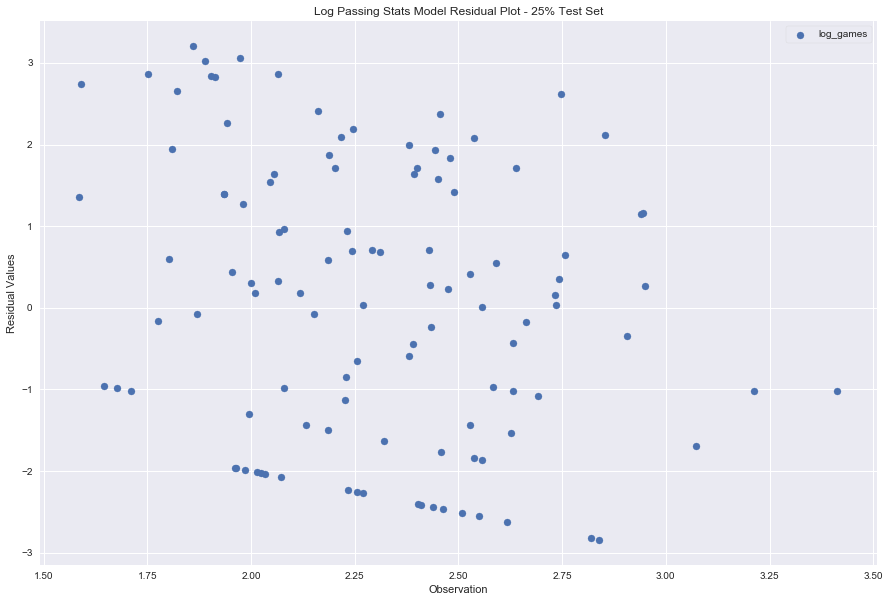

In [29]:
resid5 = y_test - preds5
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.scatter(preds5, resid5)
plt.title('Log Passing Stats Model Residual Plot - 25% Test Set')
plt.xlabel('Observation')
plt.ylabel('Residual Values')
plt.legend(frameon = 'True');

### Question Response
Using train/test split, the R^2 value of the model is reduced, but that is to be expected. Fortunately, the distribution of the error seems to be similar to the un-split model, which is a good. Also, the residuals still seem to be randomly distributed around zero, which indicates that regression is an acceptable choice of model.